In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

In [22]:
import math
def u(x):
    return math.log(x)

In [26]:
def us(x_list): #utility function for the list of values           
    return [u(x) for x in x_list]

In [36]:
def cal_post_mu2(m=3, mu=[0,0], s=[1,1], t=[1,3], w=[1/2, 1/2]):
    
    out_d = {"x_j":[], "x":[], "y_j":[], "y":[], "eu_pr":[], "eu_pw":[]} #dictionary that is returned
    
    i_t = [] #list to store index of maximum true multiattribute utility
    
    #list to store index of maximum 
    i_e = [] #estimates
    i_pr = [] #posterior right way
    i_pw = [] #posterior wrong way

    
    def cal_u(multiatt):
        ul = [u(multiatt[i]) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    for k in range(50000):
        x = []
        eu = []
        eu_pr = []
        eu_pw = []
        x_js = []
        y_js = []
            
        for j in range(m): #loop for generating m number of mu alternatives

            
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the m.a.utility of one mu alternative u(x_j)           
            x_js.append(x_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the m.a.utility of one mu estimates u(y_j)
            y_js.append(y_j)
            
            x_jp_r = [] #one alternative, right way
            x_jp_w = [] #one alternative, wrong way
            
            for i in range(n): #loop for generating posterior mu for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*(math.log(y_j[i])+((t[i]**2)/2))
                p_var = (s[i]**2*t[i]**2)/(s[i]**2 + t[i]**2)
                
                x_p_ji = list(np.random.lognormal(p_mean, np.sqrt(p_var),10000))
                
                #right way
                x_jp_r.append(np.mean(us(x_p_ji)))
                #wrong way
                x_jp_w.append(np.mean(x_p_ji))

            #wrong way
            eu_pw.append(cal_u(x_jp_w)) #append u(x) of one posterior alternative (repeated 1000 times)            
            
            #right way
            eu_pr.append(np.dot(w, x_jp_r)) #append w_i*E[u(x)|y]
        
        out_d["x_j"].append(x_js)
        out_d["y_j"].append(y_js)
        out_d["x"].append(x)   
        out_d["y"].append(eu)
        out_d["eu_pr"].append(eu_pr)
        out_d["eu_pw"].append(eu_pw)
        
        #index of true max
        max_ix = x.index(max(x))
        i_t.append(max_ix)
              
        ###Saving result from estimates
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)
        i_e.append(max_j)

        
        ###Saving result from posterior right way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu1 = max(eu_pr)
        max_j1 = eu_pr.index(max_eu1)
        i_pr.append(max_j1)
        

        ###Saving result from posterior wrong way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu2 = max(eu_pw)
        max_j2 = eu_pw.index(max_eu2)
        i_pw.append(max_j2)

    out_d["i_t"] = i_t
    out_d["i_e"] = i_e
    out_d["i_pr"] = i_pr
    out_d["i_pw"] = i_pw

    
    return out_d

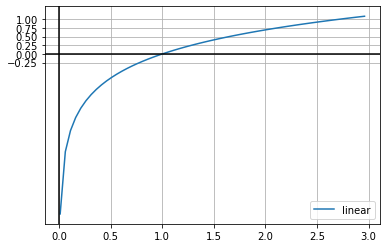

In [24]:
X = np.arange(0.01,3,0.05)
Y3 = [u(x) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

In [49]:
r2 = cal_post_mu2()

In [50]:
for i in range(len(r2["i_e"])):
    if (r2["i_t"][i]!=r2["i_pr"][i]) & (r2["i_t"][i]!=r2["i_e"][i]) & ((r2["i_e"][i]!=r2["i_pr"][i])) & (r2["i_pr"][i]!=r2["i_pw"][i]):
        print(i)

529
1218
1366
1597
1624
2045
2942
4133
5013
5078
5242
5380
5532
5534
5684
5803
6743
6840
6936
7143
7779
8355
9078
10324
10977
11287
11332
11370
11921
12841
13168
13994
14612
15167
15827
17159
18132
18148
19065
19543
19843
19907
21929
22088
23594
24801
24936
25279
25362
25584
25959
26277
26374
26490
26627
26655
26876
26918
27247
27253
28403
29065
29075
30141
30316
30576
30700
32297
33213
33582
33641
34486
34836
34927
35309
36155
36888
36912
37312
38530
38662
39484
39647
40265
42367
42803
43908
44090
44205
44336
44756
45154
45347
45995
47252
47257
47438
47603
47882
48487
48608
48953
49458


In [39]:
def print_values(index):
    print("x_js: ", r2["x_j"][index])
    print("x: ", r2["x"][index])
    print("y_js: ", r2["y_j"][index])
    print("y: ", r2["y"][index])
    print("eu_pr: ", r2["eu_pr"][index])
    print("eu_pw: ", r2["eu_pw"][index])

In [40]:
print_values(1304)

x_js:  [[0.3458855912400835, 1.7184186396998429], [1.945108393347429, 1.289124732923006], [2.833456136560697, 1.1929922657300147]]
x:  [-0.26012137368098737, 0.45964059561109094, 0.6089809381282386]
y_js:  [[0.28901016948852354, 0.0001045050528190847], [0.9117670916353134, 0.7049133747461451], [6.352481445726028, 0.19545494259174362]]
y:  [-5.203784269169905, -0.22102552996099986, 0.10821005831439678]
eu_pr:  [-0.4045113533283517, 0.31623460699300887, 0.7206968164642424]
eu_pw:  [-0.06087918442863664, 0.6646153158611323, 1.074651242146615]


In [41]:
def make_df(index):
    d = {}
    d[r"x_1j"] = np.array(r2["x_j"][index])[:, 0]
    d["x_2j"] = np.array(r2["x_j"][index])[:, 1]
    
    
    d["y_1j"] = np.array(r2["y_j"][index])[:, 0]
    d["y_2j"] = np.array(r2["y_j"][index])[:, 1]
    d["x"] =r2["x"][index]
    d["y"]= r2["y"][index]
    d["eu_pr"]= r2["eu_pr"][index]
    d["eu_pw"]= r2["eu_pw"][index]
    return d

In [66]:
df = pd.DataFrame(make_df(45154))
df

,x_1j,x_2j,y_1j,y_2j,x,y,eu_pr,eu_pw
0,0.303094,0.136226,0.564899,0.004711,-1.593575,-2.964487,-0.077755,0.270079
1,1.555574,0.885997,0.284592,0.000277,0.160401,-4.724392,-0.380692,-0.047471
2,2.171328,0.124223,0.823607,0.000991,-0.655170,-3.555635,-0.071494,0.268068


In [67]:
df["eu_pr"]-df["eu_pw"]

0   -0.347834
1   -0.333221
2   -0.339563
dtype: float64

In [68]:
14/40

0.35

In [62]:
np.array(r2["x_j"][0]).T[0]

array([1.94274289, 0.34864082, 1.44545229])

In [65]:
np.array(r2["x_j"])

array([[[ 1.94274289,  0.19648732],
        [ 0.34864082,  1.45260039],
        [ 1.44545229,  0.24721168]],

       [[ 1.18536831,  1.71295059],
        [ 0.29568802,  0.40277985],
        [ 4.14400118,  0.62352713]],

       [[ 3.91934108,  1.65269884],
        [ 0.81695325,  0.59744301],
        [ 0.37926005,  0.41834199]],

       ...,

       [[ 0.27441095,  0.23952366],
        [ 0.95906791,  6.51715162],
        [ 3.86127059,  0.46188448]],

       [[ 0.39902283,  0.59768032],
        [ 1.09368869,  0.65097647],
        [ 2.59046039,  1.55715369]],

       [[ 0.36992952, 10.35780819],
        [ 3.43669276,  1.89378678],
        [ 1.85491666,  3.52821315]]])

In [82]:
r2["y_j"][0]

[[0.02864994429874386, 0.003920846945755303],
 [2.9632247509530467, 0.9861663961186699],
 [10.070883148750413, 0.003437592157254026]]

In [88]:
i = 2

In [89]:
r2["x"][i]

[1.4506195691572346, -0.026418988962673057, 0.9244020085317628]

In [90]:
r2["y"][i]

[-6.761804273535427, -3.1247897660117503, -2.6808925088734696]

In [91]:
r2["eu_pr"][i]

[-0.10340364961785803, -0.24498513501614072, 0.037524276546244045]

In [92]:
r2["eu_pw"][i]

[0.23580411154676473, 0.10061707741067027, 0.36906980155485813]